In [1]:
import seaborn as sns
import pandas as pd
from scipy import stats

In [2]:
df = pd.read_csv("sorghum/corr.csv")
# df = df.dropna(axis=1)
display(df)

,AAC(%),RS(%),PC(%),WL_72H(g),EP_72H(g),WL_144H(g),EP_144H(g),APH(cm),PW (kg),PN,PNH,PWH(t),支链淀粉含量(%),湿重(t)/公顷
0,25.715363,3.470226,10.64,0.51,0.27,0.85,0.49,152.76,0.70,14.25,38.75,5.57,59.77,23.85
1,25.861678,4.443018,16.84,0.58,0.27,0.96,0.46,134.78,0.55,46.50,41.75,4.61,52.92,15.85
2,30.215670,4.365474,11.10,0.58,0.26,1.00,0.47,140.33,0.55,26.50,42.25,4.69,56.41,15.30
3,36.289976,5.687974,11.87,0.69,0.35,1.10,0.56,154.18,0.82,15.00,32.75,5.39,72.34,22.03
4,25.404997,4.204797,12.69,0.70,0.40,1.07,0.65,146.93,0.76,16.25,39.50,5.92,54.41,24.34
5,35.598303,5.352826,15.16,0.61,0.33,1.00,0.56,138.69,0.51,15.75,46.50,4.72,72.00,19.76


/usr/local/Cellar/python3/3.6.3/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


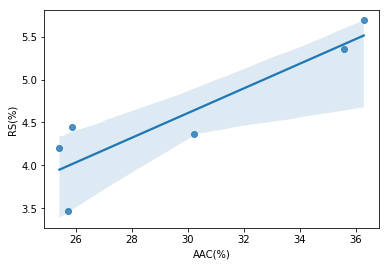

In [14]:
sns.regplot(x='AAC(%)', y='RS(%)', data=df)

In [3]:
df_corr = pd.DataFrame()
for r, row in enumerate(df.columns):
    for c, col in enumerate(df.columns[0:]):
        if r >= c:
            rv, pv = stats.pearsonr(df[col], df[row])
            df_corr.loc[row,col] = ('%.3f*' if pv<=0.05 else '%.3f') % rv
# pd.set_option('precision', 3)
display(df_corr)

,AAC(%),RS(%),PC(%),WL_72H(g),EP_72H(g),WL_144H(g),EP_144H(g),APH(cm),PW (kg),PN,PNH,PWH(t),支链淀粉含量(%),湿重(t)/公顷
AAC(%),1.000*,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RS(%),0.898*,1.000*,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PC(%),0.004,0.307,1.000*,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WL_72H(g),0.348,0.602,0.067,1.000*,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EP_72H(g),0.197,0.382,0.007,0.884*,1.000*,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WL_144H(g),0.500,0.720,0.062,0.954*,0.726,1.000*,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EP_144H(g),0.139,0.267,-0.076,0.802,0.982*,0.633,1.000*,NaN,NaN,NaN,NaN,NaN,NaN,NaN
APH(cm),0.106,-0.051,-0.755,0.203,0.340,0.083,0.351,1.000*,NaN,NaN,NaN,NaN,NaN,NaN
PW (kg),-0.013,0.036,-0.533,0.525,0.579,0.372,0.537,0.888*,1.000*,NaN,NaN,NaN,NaN,NaN
PN,-0.374,-0.121,0.645,-0.256,-0.514,-0.163,-0.603,-0.732,-0.519,1.000*,NaN,NaN,NaN,NaN


In [ ]:
df3 = pd.DataFrame({'直链+支链': df['AAC(%)'].values + df['支链淀粉含量(%)'].values, 'RS': df1['抗性淀粉含量(%)'].values})
display(df3)

In [5]:
# 相关系数，显著性区别
display(stats.pearsonr(df['AAC(%)'] + df['支链淀粉含量(%)'], df['RS(%)']))

(0.8311239125563005, 0.0403705995738496)